# Linear Regression
Created by: Martyna Stasiak

---

To better understand the topic of regression, especially the linear regression that we will be practicing in here, go over the slides from fourth meeting about the Regression.<br>
In here we will go through simple and multple linear regression, go over the metrics to check how well they perform and at the end you will have a short task to practice.

First lets load the neccesary libraries that we will use today:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LinearRegression # to apply the linear regression
from sklearn.metrics import mean_squared_error, r2_score # to check the model performance
import plotly.graph_objects as go #for 3d visualization in multiple lr\import plotly.graph_objects as go



## Simple linear regression

Now lets load the dataset that we will use for the **Simple linear regression** for now; <br>
it is a dataset about the sales, and we have 3 features in it- TV, Radio, Newspapper and a target variable- Sales.<br>
So based on this data our goal is to make a model that predicts the sales based on the money spent on different marketing "strategies" i.e. that is our features- TV, Radio & Newspapper.

Make sure that you have downloaded the dataset- *advertising.csv* from the github repo with the notebook; <br>
You may also download it directly from the kaggle webpage (you need to have the profile): https://www.kaggle.com/datasets/ashydv/advertising-dataset 

In [2]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.shape

(200, 4)

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Now that we have the data loaded and we have checked that there are no missing values, let's visualize the correlation between the features using a heatmap. This will help us understand which features have the strongest relationship with our target variable, Sales. By identifying these relationships, we can make more informed decisions when building our linear regression model.Now when we have the data loaded, and we know which one has the biggest influence on our target variable so we can make a good linear regression.

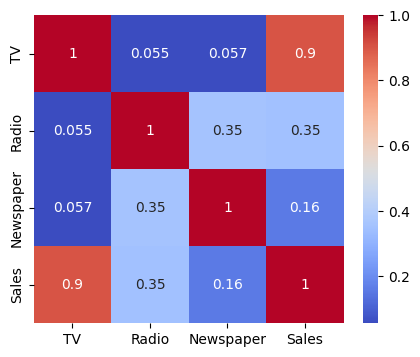

In [5]:
plt.figure(figsize=(5, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


The heatmap results indicate the following correlations between the variables:
 
- `Sales and TV` have the `highest correlation of 0.9`, suggesting a strong positive relationship. This implies that as TV advertising increases, sales tend to increase significantly.
- `Sales and Radio` have a moderate correlation of 0.35, indicating a weaker positive relationship compared to TV. This suggests that radio advertising has a smaller impact on sales.
- `Sales and Newspaper` have a low correlation of 0.16, indicating a very weak positive relationship. This suggests that newspaper advertising has minimal impact on sales.

Additionally, the diagonal of the heatmap contains ones because each variable is being compared with itself, resulting in a perfect correlation. <br><br>

Since the `TV` and `Sales` variables have the highest correlation (0.9), we will use `TV` as the predictor in our simple linear regression model. This strong positive relationship suggests that as TV advertising increases, sales tend to increase significantly. By focusing on `TV` as our feature, we aim to build a model that accurately predicts sales based on TV advertising spend. This approach allows us to understand the impact of TV advertising on sales and make informed decisions for future marketing strategies.

-----


Now we will be splitting the dataset into training and testing sets. This step is crucial for evaluating the performance of our linear regression model. By dividing the data, we can train the model on one portion (training set) and test it on the other (testing set). This helps us understand how well our model generalizes to unseen data and ensures that it is not overfitting to the training data. The training set will be used to fit the model, while the testing set will be used to evaluate its performance.

In [6]:
X = data[['TV']]  # Using only 'TV' as the feature for simple linear regression
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

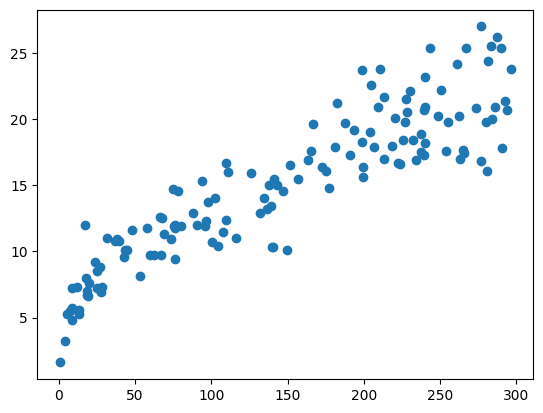

In [7]:
# we may see how the data looks now:
plt.scatter(X_train, y_train)

Now let's actually train our linear regression model. For that, we will use the `LinearRegression()` method from the `sklearn.linear_model` library. This method will help us create a linear regression model that can be trained on our dataset. By fitting the model to our training data, we can learn the relationship between the feature (TV advertising spend) and the target variable (Sales). Once the model is trained, we will evaluate its performance on both the training and testing sets to understand how well it generalizes to unseen data.

In [8]:
simpleLR_model = LinearRegression() 
simpleLR_model.fit(X_train, y_train) # training the model

LinearRegression()

In [9]:
#now we evaluate the model
y_train_pred = simpleLR_model.predict(X_train)

In [10]:
# To get the coefficient- Betas from the linear regression formula we may use: 
beta_0 = simpleLR_model.intercept_
beta_1 = simpleLR_model.coef_[0]

print(f"Intercept (beta_0): {beta_0}")
print(f"Coefficient for TV (beta_1): {beta_1}")

Intercept (beta_0): 6.948683200001357
Coefficient for TV (beta_1): 0.054545752915907963


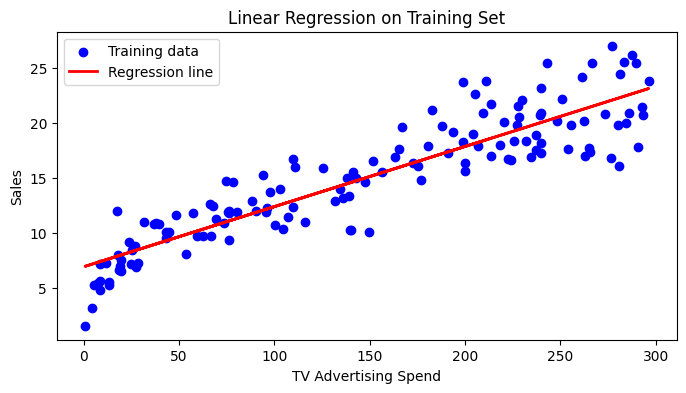

In [11]:
plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.title('Linear Regression on Training Set')
plt.show()

Now let's see how well our model performs using Mean Squared Error (MSE) and R-squared (R²) metrics. 

- **Mean Squared Error (MSE)**: This metric measures the average of the squares of the errors—that is, the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data.

- **R-squared (R²)**: This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R² value closer to 1 indicates that a larger proportion of the variance is accounted for by the model, suggesting a better fit.

By evaluating these metrics on both the training and testing sets, we can understand how well our model generalizes to unseen data and ensure that it is not overfitting to the training data.

In [12]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")
print(f"Training R2: {train_r2}")

Training MSE: 5.752400386486835
Training R2: 0.8157933136480389


In [13]:
# now we evaluate the model on the test set
y_test_pred = simpleLR_model.predict(X_test)

In [14]:
# now we check the evaluation/performance metrics on the test set 
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Testing MSE: {test_mse}")
print(f"Testing R2: {test_r2}")

Testing MSE: 4.077556371826948
Testing R2: 0.7921031601245662


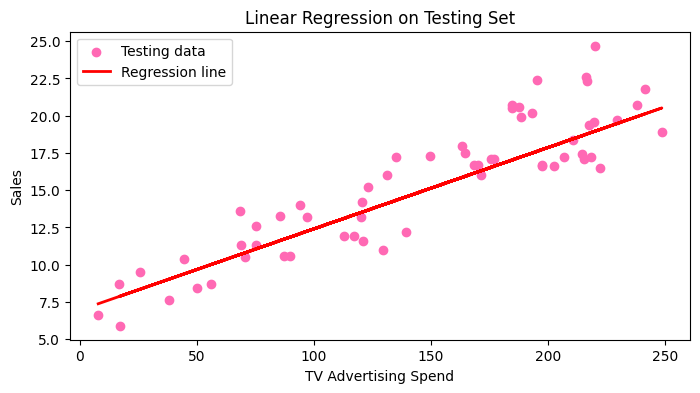

In [15]:
# now we plot the regression line on the test set
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color='hotpink', label='Testing data')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.title('Linear Regression on Testing Set')
plt.show()

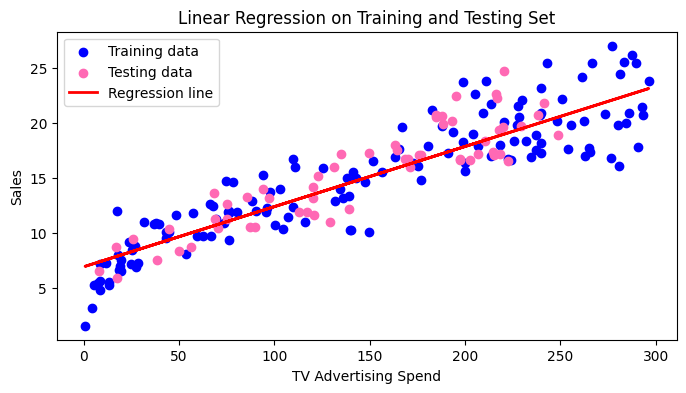

In [16]:
#and now lets see the training set and test set on the same plot
plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='hotpink', label='Testing data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.title('Linear Regression on Training and Testing Set')
plt.show()

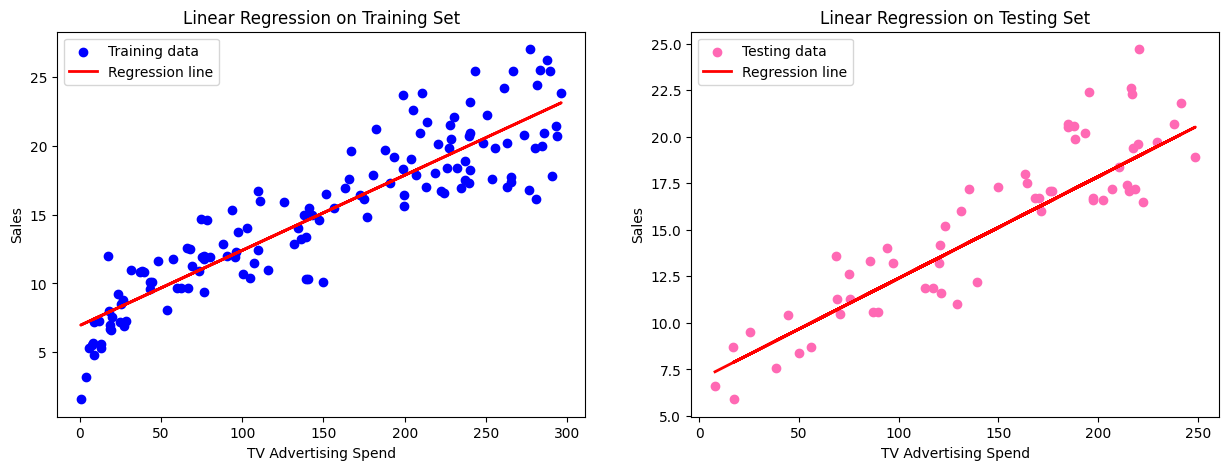

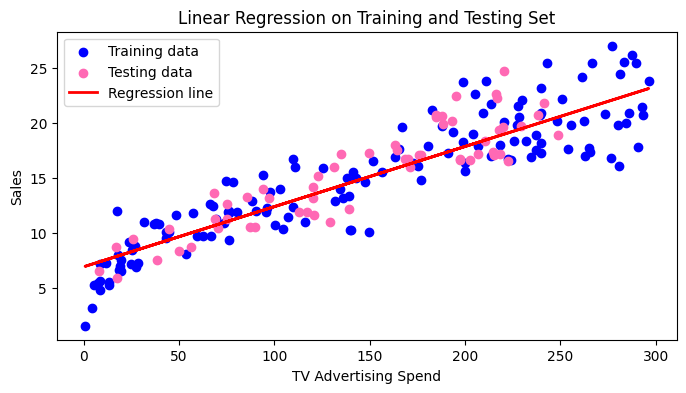

In [17]:
# and also lets see the plots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(X_train, y_train, color='blue', label='Training data')
ax1.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression line')
ax1.set_xlabel('TV Advertising Spend')
ax1.set_ylabel('Sales')
ax1.legend()
ax1.set_title('Linear Regression on Training Set')
ax2.scatter(X_test, y_test, color='hotpink', label='Testing data')
ax2.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression line')
ax2.set_xlabel('TV Advertising Spend')
ax2.set_ylabel('Sales')
ax2.legend()
ax2.set_title('Linear Regression on Testing Set')

# Combined graph for training and testing sets
fig, ax3 = plt.subplots(figsize=(8, 4))
ax3.scatter(X_train, y_train, color='blue', label='Training data')
ax3.scatter(X_test, y_test, color='hotpink', label='Testing data')
ax3.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression line')
ax3.set_xlabel('TV Advertising Spend')
ax3.set_ylabel('Sales')
ax3.legend()
ax3.set_title('Linear Regression on Training and Testing Set')
plt.show()

Now we can make predictions using our linear regression model. For example, let's predict the sales if we invest $213 in TV advertising.

In [18]:
#feel free to change the tv_advertising value to see other predictions
tv_adverising = pd.DataFrame({'TV': [213]})
predicted_sales = simpleLR_model.predict(tv_adverising)
print(f"The sales that our model has predicted for spending ${tv_adverising.iloc[0, 0]} on TV advertising is ${predicted_sales[0]:.2f}")

The sales that our model has predicted for spending $213 on TV advertising is $18.57


---------



## Multiple linear regression

Now, since we have gone through the simple linear regression where we had only one predictor (independent variable) - X, let's move on to multiple linear regression.

Multiple linear regression is an extension of simple linear regression that allows us to model the relationship between a dependent variable and multiple independent variables. In other words, instead of using just one predictor to estimate the target variable, we use two or more predictors. This approach helps us understand how multiple factors collectively influence the target variable and can lead to more accurate predictions.

In the context of our dataset, we will use TV and Radio advertising spends as predictors to estimate Sales. By considering multiple predictors, we aim to build a more comprehensive model that captures the combined effect of different marketing strategies on sales.

In [19]:
X = data[['TV', 'Radio']]  # Using  'TV' and 'Radio' as the independant variables for multiple linear regression
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [20]:
scatter = go.Scatter3d(
    x=X_train['TV'], y=X_train['Radio'], z=y_train,
    mode='markers',
    marker=dict(size=3),
    name='Training data'
)

# Create the figure and add the scatter plot
fig = go.Figure(data=[scatter])

# Update the layout
fig.update_layout(
    title='3D Scatter Plot of Training Data',
    scene=dict(
        xaxis_title='TV Advertising Spend',
        yaxis_title='Radio Advertising Spend',
        zaxis_title='Sales'
    )
)

# Show the figure
fig.show()

In [21]:
multipleLR_model = LinearRegression() 
multipleLR_model.fit(X_train, y_train) # training the model

LinearRegression()

In [22]:
#now we evaluate the model
y_train_pred = multipleLR_model.predict(X_train)

In [23]:
beta_0 = multipleLR_model.intercept_
beta_1 = multipleLR_model.coef_[0]
beta_2 = multipleLR_model.coef_[1]

print(f"Intercept (beta_0): {beta_0}")
print(f"Coefficient for TV (beta_1): {beta_1}")
print(f"Coefficient for Radio (beta_2): {beta_2}")

Intercept (beta_0): 4.425124731545283
Coefficient for TV (beta_1): 0.053975926246645975
Coefficient for Radio (beta_2): 0.11374333214117219


In [24]:
# Create a meshgrid for TV and Radio
tv_range = np.linspace(X['TV'].min(), X['TV'].max(), 10)
radio_range = np.linspace(X['Radio'].min(), X['Radio'].max(), 10)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Predict sales for each point in the grid
sales_grid = beta_0 + beta_1 * tv_grid + beta_2 * radio_grid

# Create the scatter plot for the training data
scatter = go.Scatter3d(
    x=X_train['TV'], y=X_train['Radio'], z=y_train,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Training data'
)

# Create the surface plot for the regression plane
surface = go.Surface(
    x=tv_grid, y=radio_grid, z=sales_grid,
    colorscale='Viridis',
    opacity=0.5,
    name='Regression plane'
)

# Create the figure and add the scatter and surface plots
fig = go.Figure(data=[scatter, surface])

# Update the layout
fig.update_layout(
    title='3D Scatter Plot of Training Data with Regression Plane',
    scene=dict(
        xaxis_title='TV Advertising Spend',
        yaxis_title='Radio Advertising Spend',
        zaxis_title='Sales'
    )
)

# Show the figure
fig.show()

In [25]:
# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")
print(f"Training R2: {train_r2}")

Training MSE: 2.811634699498671
Training R2: 0.9099642103419103


In [26]:
# now we evaluate the model on the test set
y_test_pred = multipleLR_model.predict(X_test)

In [27]:
# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Testing MSE: {test_mse}")
print(f"Testing R2: {test_r2}")

Testing MSE: 2.545286905758097
Testing R2: 0.8702269065022538


Now we may see the plot with both train(blue) and test(red) data 

In [28]:
# Create a 3D scatter plot for the test data
test_scatter = go.Scatter3d(
    x=X_test['TV'], y=X_test['Radio'], z=y_test,
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Testing data'
)

# Add the test scatter plot to the existing figure
fig.add_trace(test_scatter)

# Update the layout
fig.update_layout(
    title='3D Scatter Plot of Training and Testing Data with Regression Plane',
    scene=dict(
        xaxis_title='TV Advertising Spend',
        yaxis_title='Radio Advertising Spend',
        zaxis_title='Sales'
    )
)

# Show the figure
fig.show()

------

## Task for you:
Create both simple linear regression and multiple linear regression models on the dataset from below.<br>
Take into consideration only 2 predictors - X variables.<br> 
Make sure you have downloaded it from the github repo, or do this directly from the kaggle: https://www.kaggle.com/datasets/camnugent/california-housing-prices (to download any dataset from kaggle you must have a profile created)<br>
Visualize the data points and regression line/plane and evaluate the models.<br>
You may reuse the code used above.

In [29]:
housing_data = pd.read_csv("housing.csv")
housing_data = housing_data.drop('ocean_proximity', axis=1)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [30]:
housing_data.shape

(20640, 9)

In [31]:
# Check for missing or NaN values in the housing_data DataFrame
missing_values = housing_data.isnull().sum()
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


In [32]:
housing_data = housing_data.dropna()
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [33]:
housing_data.shape

(20433, 9)

In [34]:
missing_values = housing_data.isnull().sum()
print(missing_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


After this really simple preprocessing- ensuring no missing values you may approach the actual task :)

In [35]:
#TODO

----

If you have any questions or need further clarification, please contact me via Discord or Messenger.